# Prutha Dolia
### Part 1

*Due: 9/27/19 11:59pm* 


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import percentile
%matplotlib inline
import seaborn as sns
from numpy import percentile

## Part 1 

This problem will use data from the Department of Transportation's Transit Statistics. The data was collected from:  
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236
Information on the variables can be found there in the Glossary.  You will use the file `flights-jan2019-ORD-MSP.csv`, includes flight information for all flights arriving or leaving Chicago O'hare (ORD) and Minneapolis (MSP) airports in January 2019.   

Information about airports is also available in the file `airports.dat`.  This data was collected from [Open Flights](https://openflights.org/data.html).  

Disclaimer: There are additional functions to help deal with time data that is not presented or expected in the problems asked below.

In [53]:
flights = pd.read_csv("flights-jan2019-ORD-MSP.csv", 
                      dtype = {'CRS_ARR_TIME': 'f8', 'CRS_DEP_TIME': 'f8'})
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME
0,2019,1,10,2019-01-10,OO,N938SW,5011,ORD,FWA,1605.0,1629.0,1816.0,1827.0
1,2019,1,10,2019-01-10,OO,N908SW,5012,ORD,MBS,1400.0,1403.0,1616.0,1626.0
2,2019,1,10,2019-01-10,OO,N980SW,5014,ORD,LWB,1415.0,1405.0,1720.0,1703.0
3,2019,1,10,2019-01-10,OO,N701BR,5023,ORD,SLN,1007.0,1007.0,1213.0,1234.0
4,2019,1,10,2019-01-10,OO,N471CA,5030,ORD,SPI,1400.0,1349.0,1504.0,1442.0


In [54]:
airports_cols = [
    'openflights_id',
    'name',
    'city',
    'country',
    'iata',
    'icao',
    'latitude',
    'longitude',
    'altitude',
    'tz',
    'dst',
    'tz_olson',
    'type',
    'airport_dsource'
]

airports = pd.read_csv("airports.dat", sep =',', names=airports_cols)
airports.head()

,openflights_id,name,city,country,iata,icao,latitude,longitude,altitude,tz,dst,tz_olson,type,airport_dsource
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby,NaN,NaN
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby,NaN,NaN
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby,NaN,NaN
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby,NaN,NaN
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby,NaN,NaN


### Question 1  (10 pts)

Both the departure and arrival were read in a floating-point numbers. Write two functions, `extract_hour` and `extract_mins` that converts military time to hours and minutes, respectively. Hint: You may want to use modular arithmetic and integer division.

In [55]:
def extract_hour(time):
    return(pd.to_numeric(time//100))

In [56]:
def extract_mins(time):
    return(pd.to_numeric(time%100))

### Question 2  (10 pts)

Using your two functions above, filter the `flights` data for flights that departed 15 or more minutes later than scheduled.  You do not need to worry about flights that were delayed to the next day for this question.

In [57]:
def convert_to_minofday(time):
    hr = extract_hour(time)
    min = extract_mins(time)
    return(hr*60+min)

def calc_time_diff(x, y):
    time1 = convert_to_minofday(x)
    time2 = convert_to_minofday(y)
    return(time2-time1)

In [58]:
#data for flights that departed 15 or more minutes later than scheduled
flights1 = flights[(flights["DEP_TIME"] - flights["CRS_DEP_TIME"])>15]
flights1.head()

,YEAR,MONTH,DAY_OF_MONTH,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME
0,2019,1,10,2019-01-10,OO,N938SW,5011,ORD,FWA,1605.0,1629.0,1816.0,1827.0
6,2019,1,10,2019-01-10,OO,N980SW,5037,ORD,MKG,1025.0,1046.0,1232.0,1246.0
13,2019,1,10,2019-01-10,OO,N963SW,5060,ORD,AVL,1800.0,1844.0,2052.0,2158.0
27,2019,1,10,2019-01-10,OO,N920SW,5240,ORD,BHM,1535.0,1610.0,1733.0,1801.0
28,2019,1,10,2019-01-10,OO,N916SW,5252,ORD,BIS,1000.0,1053.0,1227.0,1309.0


### Question 3  (5 pts)

Using your answer from question 2, find the full name of every destination city with a flight that was delayed by 15 or more minutes.  The airport codes used in `flights` are IATA codes.  Sort the cities alphabetically.  

*Hint: consider using the function `isin()`*

In [232]:
merge_data = pd.merge(flights1, airports,  how='left', left_on=["DEST"], right_on = ["iata"])
merge_data = merge_data.sort_values('city')
merge_data[["DEST","city"]].head()

,DEST,city
2095,CAK,Akron
272,CAK,Akron
271,CAK,Akron
6078,CAK,Akron
6079,CAK,Akron


### Question 4  (5 pts)

Find the tail number of the top ten planes, measure by number of destinations that plane flew to in January.  You may find `drop_duplicates` and `sort_values` helpful. 

In [128]:
flights_new = flights[flights["MONTH"] == 1]

In [241]:
(flights_new["TAIL_NUM"].value_counts().head(10)) #top flights and their counts

N905JH    216
N939AE    197
N909AE    193
N902BC    191
N615AE    188
N680AE    182
N688AE    181
N908AE    170
N923AE    167
N667GB    166
Name: TAIL_NUM, dtype: int64

### Question 5  (10 pts)

You will now add two new columns to the `flights` DataFrame that will contain the departure delay and arrival delay. 

In [136]:
flights['DELAY_DEP'] = flights["ARR_TIME"] - flights["CRS_ARR_TIME"]
flights['DELAY_ARR'] = flights["DEP_TIME"] - flights["CRS_DEP_TIME"]

In [143]:
fl_new = flights[["TAIL_NUM","ORIGIN","DELAY_DEP","DELAY_ARR"]]
fl_new.head()

,TAIL_NUM,ORIGIN,DELAY_DEP,DELAY_ARR
0,N938SW,ORD,11.0,24.0
1,N908SW,ORD,10.0,3.0
2,N980SW,ORD,-17.0,-10.0
3,N701BR,ORD,21.0,0.0
4,N471CA,ORD,-62.0,-51.0


Plot the distribution of departure delays for all flights leaving ORD.  Also, plot the distribution of departure delays for all flights from leaving MSP.  Make sure to label and make the plots look nice. 

In [167]:
#filtering flights leaving ORD and MSP
fl_ord = fl_new[fl_new["ORIGIN"] == "ORD"]
fl_msp = fl_new[fl_new["ORIGIN"] == "MSP"]

In [198]:
#removing the NA values
fl_ord_dna = fl_ord.dropna()
fl_msp_dna = fl_msp.dropna()

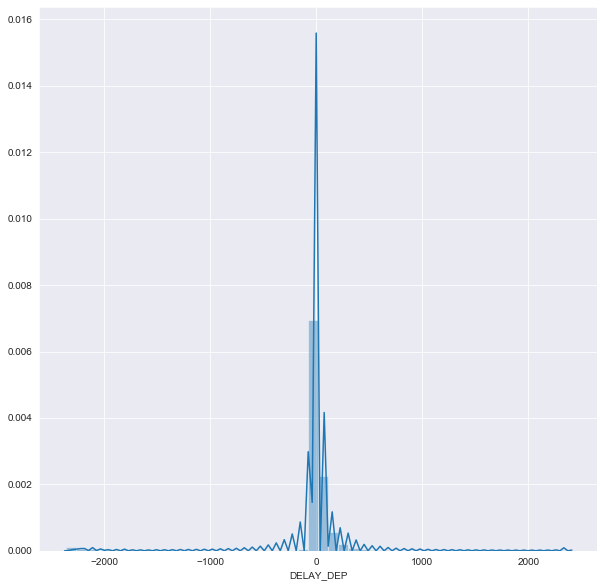

In [237]:
#distribution of flights leaving ORD using seaborn
plt.figure(figsize=(10,10)) 
sns.set_style('darkgrid')
sns.distplot(fl_ord_dna["DELAY_DEP"])

Text(0.5, 1.0, 'Departure Delays from ORD')

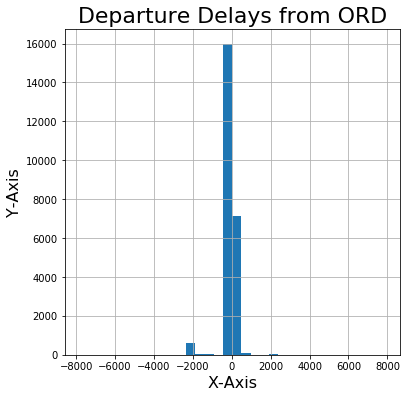

In [229]:
#distribution of flights leaving ORD showing as histograms
plt.figure(figsize=(6,6)) 
hist = fl_ord_dna["DELAY_DEP"].hist(bins=10)
plt.axis('equal') 
plt.xlabel('X-Axis', fontsize=16)                  
plt.ylabel('Y-Axis', fontsize=16)                  
plt.title('Departure Delays from ORD', fontsize=22)

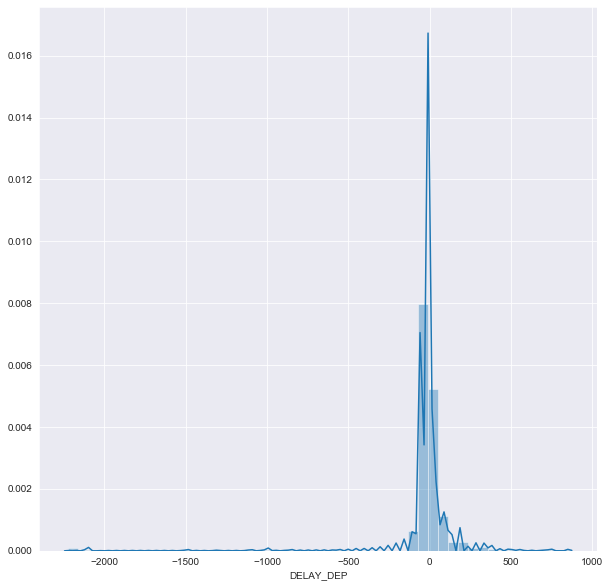

In [238]:
#distribution of flights leaving MSP using seaborn
plt.figure(figsize=(10,10)) 
sns.set_style('darkgrid')
sns.distplot(fl_msp_dna["DELAY_DEP"])

Text(0.5, 1.0, 'Departure Delays from MSP')

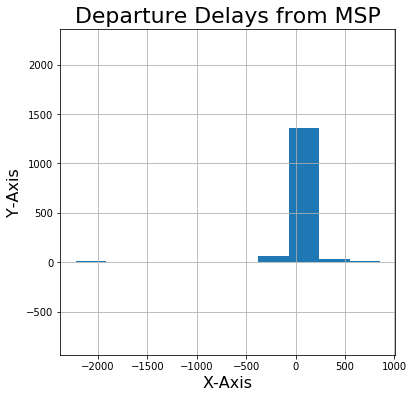

In [231]:
#distribution of flights leaving MSP showing as histogram
plt.figure(figsize=(6,6)) 
hist1 = fl_msp_dna["DELAY_DEP"].hist(bins=10)
plt.axis('equal') 
plt.xlabel('X-Axis', fontsize=16)                  
plt.ylabel('Y-Axis', fontsize=16)                  
plt.title('Departure Delays from MSP', fontsize=22)

Present the mean, standard deviation, and 5-number summary of the arrival delays for ORD and MSP.

In [202]:
#mean, standard deviation, and 5-number summary of the arrival delays for ORD
print("ORD mean = ",fl_ord_dna["DELAY_ARR"].mean())
print("ORD std = ",fl_ord_dna["DELAY_ARR"].std())

# calculate quartiles
quartiles = percentile(fl_ord_dna["DELAY_ARR"], [25, 50, 75])
# calculate min/max
data_min, data_max = fl_ord_dna["DELAY_ARR"].min(), fl_ord_dna["DELAY_ARR"].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

ORD mean =  19.322590072224774
ORD std =  151.25533886834344
Min: -2207.000
Q1: -5.000
Median: -1.000
Q3: 25.000
Max: 1306.000


In [204]:
#mean, standard deviation, and 5-number summary of the arrival delays for MSP
print("MSP mean = ",fl_msp_dna["DELAY_ARR"].mean())
print("MSP std = ",fl_msp_dna["DELAY_ARR"].std())

# calculate quartiles
quartiles = percentile(fl_msp_dna["DELAY_ARR"], [25, 50, 75])
# calculate min/max
data_min, data_max = fl_msp_dna["DELAY_ARR"].min(), fl_msp_dna["DELAY_ARR"].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

MSP mean =  18.284267386900744
MSP std =  124.15653623069619
Min: -1296.000
Q1: -7.000
Median: -3.000
Q3: 5.000
Max: 1378.000


### Question 6 (10 pts)

For the flights from CMX -> ORD, Houghton to Chicago, and from ORD -> CMX, calculate the mean, standard deviation, and 5-number summary of the arrival delay. Also, plot the distribution of values overlapping in one plot.  

In [219]:
#Houghton to Chicago
flights_c2o = flights[flights["ORIGIN"] == "CMX"]
flights_c2o = flights_c2o[flights_c2o["DEST"] == "ORD"]

print("CMX to ORD mean = ",flights_c2o["DELAY_ARR"].mean())
print("CMX to ORD std = ",flights_c2o["DELAY_ARR"].std())

flights_c2o = flights_c2o.dropna()

# calculate quartiles
quartiles = percentile(flights_c2o["DELAY_ARR"], [25, 50, 75])
# calculate min/max
data_min, data_max = flights_c2o["DELAY_ARR"].min(), flights_c2o["DELAY_ARR"].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

CMX to ORD mean =  11.416666666666666
CMX to ORD std =  75.59377249295284
Min: -60.000
Q1: -13.000
Median: -7.500
Q3: 4.250
Max: 303.000


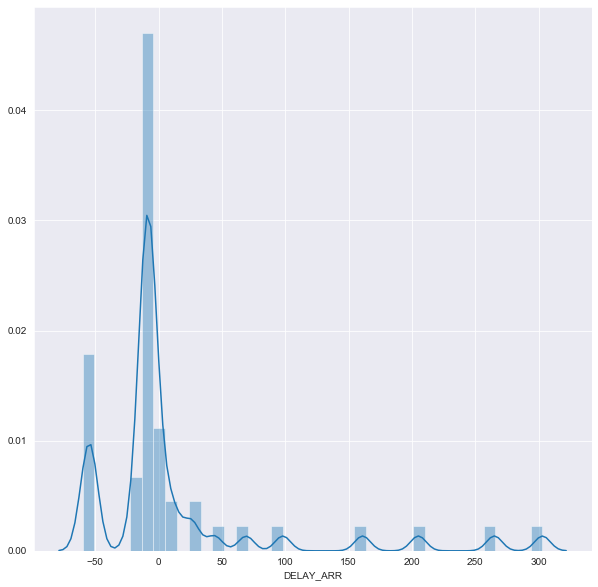

In [242]:
#distribution using seaborn
plt.figure(figsize=(10,10)) 
sns.set_style('darkgrid')
sns.distplot(flights_c2o["DELAY_ARR"])

Text(0.5, 1.0, 'Departure Delays from ORD')

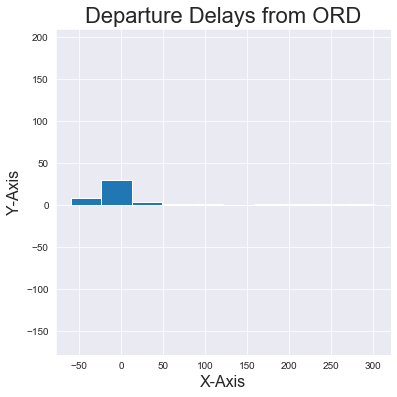

In [243]:
#distribution showing as histograms
plt.figure(figsize=(6,6)) 
hist = flights_c2o["DELAY_ARR"].hist(bins=10)
plt.axis('equal') 
plt.xlabel('X-Axis', fontsize=16)                  
plt.ylabel('Y-Axis', fontsize=16)                  
plt.title('Departure Delays from ORD', fontsize=22)

In [220]:
#Chicago to Houghton
flights_o2c = flights[flights["ORIGIN"] == "ORD"]
flights_o2c = flights_o2c[flights_o2c["DEST"] == "CMX"]

print("ORD to CMX mean = ",flights_o2c["DELAY_ARR"].mean())
print("ORD to CMX std = ",flights_o2c["DELAY_ARR"].std())

flights_o2c = flights_o2c.dropna()

# calculate quartiles
quartiles = percentile(flights_o2c["DELAY_ARR"], [25, 50, 75])
# calculate min/max
data_min, data_max = flights_o2c["DELAY_ARR"].min(), flights_o2c["DELAY_ARR"].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

ORD to CMX mean =  -28.73469387755102
ORD to CMX std =  304.12721950897213
Min: -2084.000
Q1: -8.500
Median: -4.000
Q3: 11.750
Max: 198.000


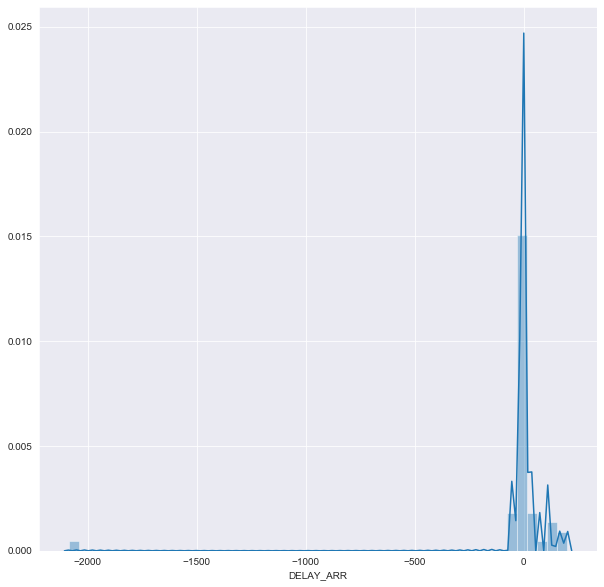

In [244]:
#distribution using seaborn
plt.figure(figsize=(10,10)) 
sns.set_style('darkgrid')
sns.distplot(flights_o2c["DELAY_ARR"])

Text(0.5, 1.0, 'Departure Delays from ORD')

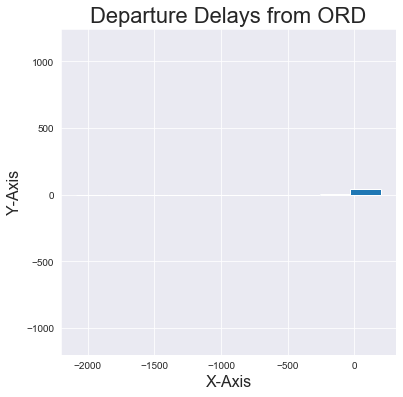

In [245]:
#distribution showing as histograms
plt.figure(figsize=(6,6)) 
hist = flights_o2c["DELAY_ARR"].hist(bins=10)
plt.axis('equal') 
plt.xlabel('X-Axis', fontsize=16)                  
plt.ylabel('Y-Axis', fontsize=16)                  
plt.title('Departure Delays from ORD', fontsize=22)